In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('AppleCompanyStock.csv')
dataset = dataset.iloc[::-1]
print(dataset.shape)
dataset.head()

(950, 7)


,year,month,open,high,low,close,volume
949,2000,1,102.00,102.25,86.50,100.44,29872700
948,2000,1,101.00,121.50,100.44,111.31,30213200
947,2000,1,108.44,114.19,100.62,101.62,18470300
946,2000,2,101.00,110.00,94.50,108.00,21289500
945,2000,2,108.00,117.12,105.94,108.75,14859900


In [3]:
dataset.loc[5]

year      2.018000e+03
month     2.000000e+00
open      1.585000e+02
high      1.748200e+02
low       1.575100e+02
close     1.724300e+02
volume    2.225825e+08
Name: 5, dtype: float64

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 949 to 0
Data columns (total 7 columns):
year      950 non-null int64
month     950 non-null int64
open      950 non-null float64
high      950 non-null float64
low       950 non-null float64
close     950 non-null float64
volume    950 non-null int64
dtypes: float64(4), int64(3)
memory usage: 52.0 KB


In [5]:
dataset.describe()

,year,month,open,high,low,close,volume
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,9.500000e+02
mean,2008.631579,6.497895,168.952003,174.218120,164.176523,169.350997,1.092915e+08
std,5.259449,3.463112,167.253584,171.648176,163.694731,167.548177,8.144325e+07
min,2000.000000,1.000000,13.130000,13.630000,12.720000,13.120000,5.515100e+06
25%,2004.000000,3.000000,46.232500,48.335000,44.840000,46.130000,4.347195e+07
50%,2009.000000,6.500000,111.405000,114.735000,108.230000,111.940000,9.234840e+07
75%,2013.000000,9.750000,195.610000,202.487500,190.272500,195.240000,1.511180e+08
max,2018.000000,12.000000,699.350000,705.070000,693.620000,700.095000,5.003630e+08


In [6]:
ds17 = dataset[dataset['year']==2017]

Text(0.5,1,'close')

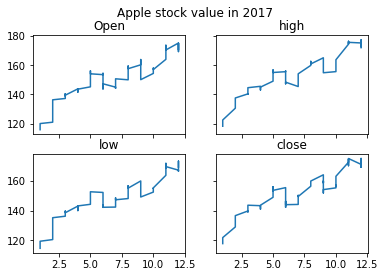

In [7]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
f.suptitle('Apple stock value in 2017')

ax1.plot(ds17['month'], ds17['open'])
ax1.set_title('Open')

ax2.plot(ds17['month'], ds17['high'])
ax2.set_title('high')

ax3.plot(ds17['month'], ds17['low'])
ax3.set_title('low')

ax4.plot(ds17['month'], ds17['close'])
ax4.set_title('close')


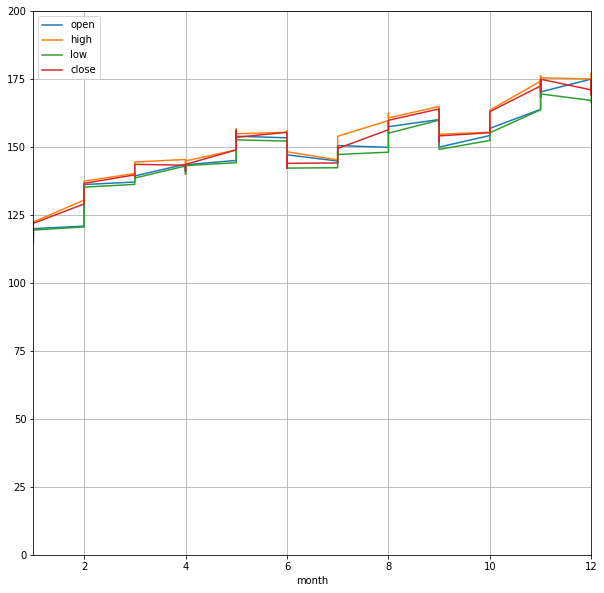

In [8]:
ds17.iloc[:, 1:6].plot(kind='line', x='month', figsize=(10,10))
plt.axis([1, 12, 0, 200])
plt.grid(True)

### Feature Engineering

I create another coloum named ```x_axis``` (To combine ```year``` and ```month``` column

```python
dataset['x_axis'] = (dataset['year']*12+dataset['month'])/12
```

In [10]:
dataset['x_axis'] = (dataset['year']*12+dataset['month'])/12
dataset.head()

,year,month,open,high,low,close,volume,x_axis
949,2000,1,102.00,102.25,86.50,100.44,29872700,2000.083333
948,2000,1,101.00,121.50,100.44,111.31,30213200,2000.083333
947,2000,1,108.44,114.19,100.62,101.62,18470300,2000.083333
946,2000,2,101.00,110.00,94.50,108.00,21289500,2000.166667
945,2000,2,108.00,117.12,105.94,108.75,14859900,2000.166667


** *Shifting last two columns* **

In [11]:
temp_val = dataset['volume']
del dataset['volume']
dataset['volume'] = temp_val
del temp_val
dataset.tail()

,year,month,open,high,low,close,x_axis,volume
4,2018,2,172.05,175.650,171.01,175.50,2018.166667,133197874
3,2018,3,176.35,180.615,172.45,176.21,2018.250000,196432091
2,2018,3,175.21,180.000,174.27,179.98,2018.250000,138442235
1,2018,3,180.29,183.500,177.62,178.02,2018.250000,151720299
0,2018,3,177.32,177.470,173.66,175.82,2018.250000,46812368


Text(0.5,1,'2000-2018')

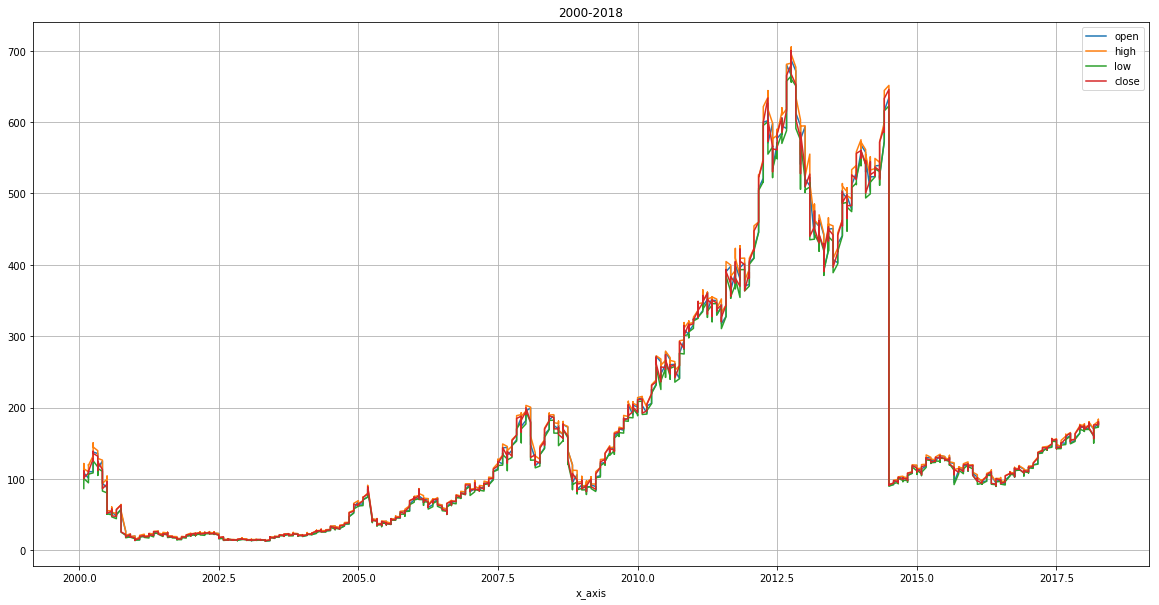

In [12]:
dataset.iloc[:, 2:7].plot(kind='line', x='x_axis', figsize=(20,10))
plt.grid(True)
plt.title('2000-2018')

In [13]:
dataset['close'].max()

700.095